In [1]:
from deep_bsde import fbsde,BSDEsolver
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
mu = 0.07
sig = 0.3
r = 0.02
K = 110
dim_x, dim_y, dim_d, dim_h, N, itr, batch_size = 1, 1, 1, 11, 10, 1000, 1000
guess_y_0 = [15,17]
x_0, T = 100*torch.ones(dim_x), 1


def b(t, x, y):
    return mu*x

def sigma(t, x):
    return sig*x.reshape(batch_size, dim_x, dim_d)

#f_american doesnt work
def f_american(t, x, y, z):
    return (-r*y + r*K* (y<=g(x))).reshape(batch_size, dim_y)

def f_europian(t, x, y, z):
    return (-r*y ).reshape(batch_size, dim_y)

def g(x):
    return torch.max(K-x, torch.zeros(batch_size, dim_y, device=device)) 

equation = fbsde(x_0, b, sigma, f_europian, g, T,dim_x, dim_y, dim_d, guess_y_0)

bsde_solver = BSDEsolver(equation, dim_h)

loss:  289.44 y0:   15.95 done:  0.00% Iteration: 0
loss:  292.33 y0:   15.91 done:  5.00% Iteration: 5
loss:  274.80 y0:   15.85 done: 10.00% Iteration: 10
loss:  293.56 y0:   15.76 done: 15.00% Iteration: 15
loss:  232.24 y0:   15.62 done: 20.00% Iteration: 20
loss:  113.18 y0:   15.33 done: 25.00% Iteration: 25
loss:   58.90 y0:   14.83 done: 30.00% Iteration: 30
loss:   55.77 y0:   14.47 done: 35.00% Iteration: 35
loss:   54.09 y0:   14.10 done: 40.00% Iteration: 40
loss:   49.44 y0:   13.92 done: 45.00% Iteration: 45
loss:   51.37 y0:   13.86 done: 50.00% Iteration: 50
loss:   53.09 y0:   13.87 done: 55.00% Iteration: 55
loss:   48.16 y0:   13.82 done: 60.00% Iteration: 60
loss:   48.75 y0:   13.97 done: 65.00% Iteration: 65
loss:   61.75 y0:   13.90 done: 70.00% Iteration: 70
loss:   51.84 y0:   13.73 done: 75.00% Iteration: 75
loss:   55.03 y0:   13.72 done: 80.00% Iteration: 80
loss:   49.59 y0:   13.66 done: 85.00% Iteration: 85
loss:   56.90 y0:   13.78 done: 90.00% Iteration

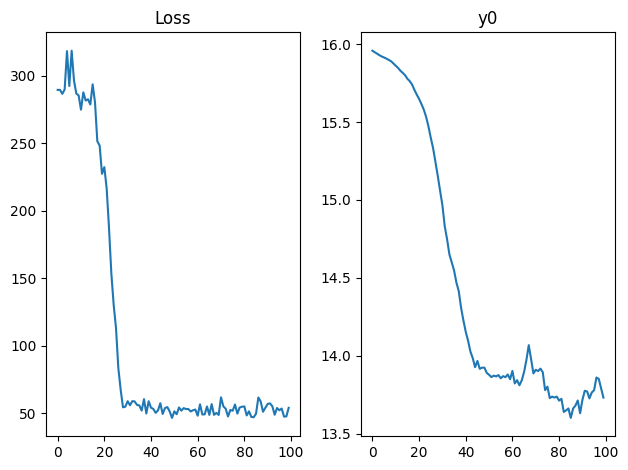

loss:   19.52 y0:   13.80 done:  0.00% Iteration: 0
loss:   18.39 y0:   13.83 done:  5.00% Iteration: 5
loss:   19.26 y0:   13.86 done: 10.00% Iteration: 10
loss:   18.26 y0:   13.89 done: 15.00% Iteration: 15
loss:   18.42 y0:   13.95 done: 20.00% Iteration: 20
loss:   18.59 y0:   14.00 done: 25.00% Iteration: 25
loss:   18.05 y0:   14.02 done: 30.00% Iteration: 30
loss:   17.02 y0:   14.07 done: 35.00% Iteration: 35
loss:   15.93 y0:   14.07 done: 40.00% Iteration: 40
loss:   16.49 y0:   14.08 done: 45.00% Iteration: 45
loss:   15.61 y0:   14.05 done: 50.00% Iteration: 50
loss:   15.63 y0:   14.04 done: 55.00% Iteration: 55
loss:   16.29 y0:   14.08 done: 60.00% Iteration: 60
loss:   16.53 y0:   14.05 done: 65.00% Iteration: 65
loss:   17.31 y0:   14.06 done: 70.00% Iteration: 70
loss:   17.16 y0:   14.06 done: 75.00% Iteration: 75
loss:   14.15 y0:   14.08 done: 80.00% Iteration: 80
loss:   15.33 y0:   14.03 done: 85.00% Iteration: 85
loss:   16.11 y0:   14.06 done: 90.00% Iteration

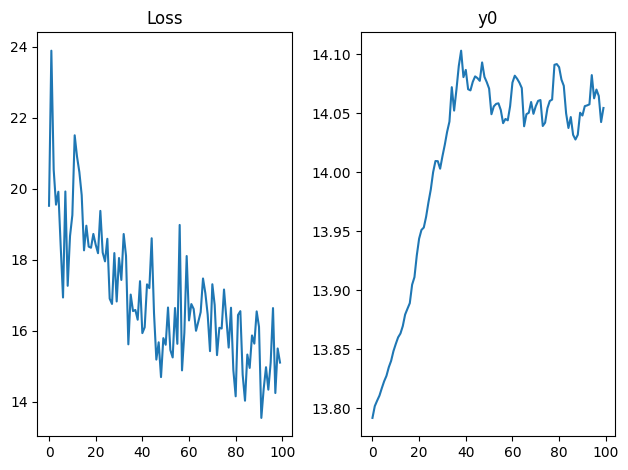

loss:    7.99 y0:   14.04 done:  0.00% Iteration: 0
loss:    8.36 y0:   14.05 done:  5.00% Iteration: 5
loss:    7.53 y0:   14.08 done: 10.00% Iteration: 10
loss:    7.10 y0:   14.07 done: 15.00% Iteration: 15
loss:    6.51 y0:   14.06 done: 20.00% Iteration: 20
loss:    6.68 y0:   14.05 done: 25.00% Iteration: 25
loss:    7.03 y0:   14.06 done: 30.00% Iteration: 30
loss:    7.56 y0:   14.07 done: 35.00% Iteration: 35
loss:    6.52 y0:   14.08 done: 40.00% Iteration: 40
loss:    6.72 y0:   14.07 done: 45.00% Iteration: 45
loss:    6.42 y0:   14.08 done: 50.00% Iteration: 50
loss:    6.42 y0:   14.08 done: 55.00% Iteration: 55
loss:    5.64 y0:   14.08 done: 60.00% Iteration: 60
loss:    6.13 y0:   14.08 done: 65.00% Iteration: 65
loss:    6.16 y0:   14.08 done: 70.00% Iteration: 70
loss:    6.31 y0:   14.07 done: 75.00% Iteration: 75
loss:    5.93 y0:   14.08 done: 80.00% Iteration: 80
loss:    6.17 y0:   14.08 done: 85.00% Iteration: 85
loss:    6.69 y0:   14.08 done: 90.00% Iteration

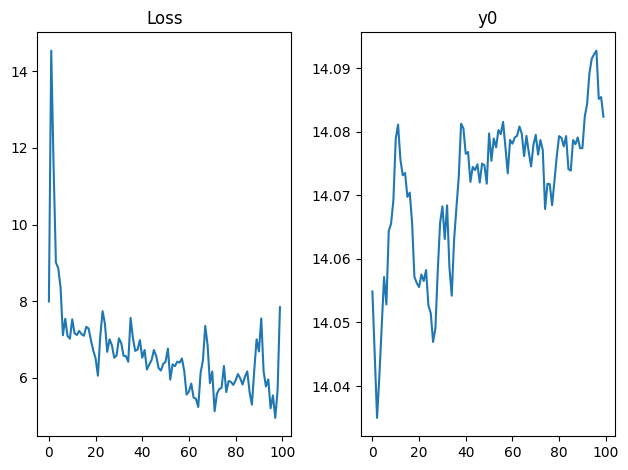

In [3]:
import matplotlib.pyplot as plt

torch.manual_seed(46)

NN = [2,10,40]
itrs = [100,100,100]
batch_sizes = [1000,1000,1000]
for N,itr,batch_size in zip(NN,itrs,batch_sizes): 
    loss, y0=bsde_solver.train(batch_size, N,itr, log=True)
    fig, axs = plt.subplots(1,2)
    axs[0].plot(loss)
    axs[0].set_title('Loss')

    axs[1].plot(y0)
    axs[1].set_title('y0')

    plt.tight_layout()
    plt.show()